# Lab 4
by Bjørn Christian Weinbach

All the classifiers that is working behind the scenes to has been added to pdffuns.py. 
The new functions are available in the appendix.

## Problem 1

### Imports

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from IPython.display import display, Latex
import seaborn as sns
sys.path.append("..") # Adds higher directory to python modules path.
import pdffuns

### Read data

In [2]:
pfile = 'lab4.p'
with open(pfile, "rb") as fp:
    Test, Train = pickle.load(fp)

### Helper Functions

In [3]:
def readData(Dataset):
    classes, features = len(Dataset), len(Dataset[0])
    classwiseData = {}
    data = pd.DataFrame()

    for cl in range(classes):
        classwiseData[cl] = [Dataset[cl][i] for i in range(features)]

    for label, features in classwiseData.items():
        df = pd.DataFrame()
        for i, feature in enumerate(features):
            index = 'x{}'.format(i+1)
            df[index] = feature

        df['class'] = label
        data = data.append(df, ignore_index=True)

    return data

def multiclassPlot(data):
    plt.rcParams['figure.dpi'] = 150
    for i in data['class'].unique():
        plt.scatter(data[data['class'] == i]['x1'], data[data['class'] == i]['x2'], 
                    label='$\omega_{}$'.format(i+1))
    plt.legend()

def recall(confusionMatrix, correct):
    return confusionMatrix[correct, correct] / sum(confusionMatrix[correct, :])

def precision(confusionMatrix, correct):
    return confusionMatrix[correct, correct] / sum(confusionMatrix[:, correct])

def accuracy(confusionMatrix):
    return (confusionMatrix.trace()) / sum(confusionMatrix.flatten())

def datasetEvaluation(train, test):
    scores = pd.DataFrame(
        columns=['classifier', 'error'] + 
        ['$p(\text{{correct}}|\omega_{{{no}}})$'.format(no=i+1) for i in list(train['class'].unique())]
    )

    # ML Reclassification
    ml_reclass, _ = pdffuns.classifyML(train, train)
    ml_reclass_cm = confusion_matrix(train['class'], ml_reclass)
    scores.loc[0] = ['ML Reclassification', 1-accuracy(ml_reclass_cm)] + \
    [recall(ml_reclass_cm, i) for i in range(len(ml_reclass_cm))]

    # ML Test
    ml_test, _ = pdffuns.classifyML(train, test)
    ml_test_cm = confusion_matrix(test['class'], ml_test)
    scores.loc[1] = ['ML Test', 1-accuracy(ml_test_cm)] + \
    [recall(ml_test_cm, i) for i in range(len(ml_test_cm))]

    # Parzen H1 = 0.1 Reclassification
    parzen_reclass = pdffuns.classifyParzen(train, train, 0.1, 0.5)
    parzen_reclass_cm = confusion_matrix(train['class'], parzen_reclass)
    scores.loc[2] = ['Parzen H1 = 0.1 Reclassification', 1-accuracy(parzen_reclass_cm)] + \
    [recall(parzen_reclass_cm, i) for i in range(len(parzen_reclass_cm))]

    # Parzen H1 = 0.1 Test
    parzen_test = pdffuns.classifyParzen(train, test, 0.1, 0.5)
    parzen_test_cm = confusion_matrix(test['class'], parzen_test)
    scores.loc[3] = ['Parzen H1 = 0.1 Test', 1-accuracy(parzen_test_cm)] + \
    [recall(parzen_test_cm, i) for i in range(len(parzen_test_cm))]

    # Parzen H1 = 5 Reclassification
    parzen_reclass = pdffuns.classifyParzen(train, train, 5, 0.5)
    parzen_reclass_cm = confusion_matrix(train['class'], parzen_reclass)
    scores.loc[4] = ['Parzen H1 = 5 Reclassification', 1-accuracy(parzen_reclass_cm)] + \
    [recall(parzen_reclass_cm, i) for i in range(len(parzen_reclass_cm))]

    # Parzen H1 = 5 Test
    parzen_test = pdffuns.classifyParzen(train, test, 5, 0.5)
    parzen_test_cm = confusion_matrix(test['class'], parzen_test)
    scores.loc[5] = ['Parzen H1 = 5 Test', 1-accuracy(parzen_test_cm)] + \
    [recall(parzen_test_cm, i) for i in range(len(parzen_test_cm))]

    # KNN K = 1 Reclassification
    knn1_reclass = pdffuns.knnClassifier(train, train, 1)
    knn1_reclass_cm = confusion_matrix(train['class'], knn1_reclass)
    scores.loc[6] = ['KNN K = 1 Reclassification', 1-accuracy(knn1_reclass_cm)] + \
    [recall(knn1_reclass_cm, i) for i in range(len(knn1_reclass_cm))]

    # KNN K = 1 Test
    knn1_test = pdffuns.knnClassifier(train, test, 1)
    knn1_test_cm = confusion_matrix(test['class'], knn1_test)
    scores.loc[7] = ['KNN K = 1 Test', 1-accuracy(knn1_test_cm)] + \
    [recall(knn1_test_cm, i) for i in range(len(knn1_test_cm))]

    # KNN K = 5 Reclassification
    knn5_reclass = pdffuns.knnClassifier(train, train, 5)
    knn5_reclass_cm = confusion_matrix(train['class'], knn5_reclass)
    scores.loc[8] = ['KNN K = 5 Reclassification', 1-accuracy(knn5_reclass_cm)] + \
    [recall(knn5_reclass_cm, i) for i in range(len(knn5_reclass_cm))]

    # KNN K = 5 Test
    knn5_test = pdffuns.knnClassifier(train, test, 1)
    knn5_test_cm = confusion_matrix(test['class'], knn5_test)
    scores.loc[9] = ['KNN K = 5 Test', 1-accuracy(knn5_test_cm)] + \
    [recall(knn5_test_cm, i) for i in range(len(knn5_test_cm))]

    return scores.set_index('classifier')

def multiclassPlot3D(data):
    plt.axes(projection='3d')
    plt.rcParams['figure.dpi'] = 150
    for i in data['class'].unique():
        plt.scatter(data[data['class'] == i]['x1'], 
                    data[data['class'] == i]['x2'],
                    data[data['class'] == i]['x3'],
                    label='$\omega_{}$'.format(i+1))
    plt.legend()

In [4]:
train, test, = readData(Train), readData(Test)

### Plot training data

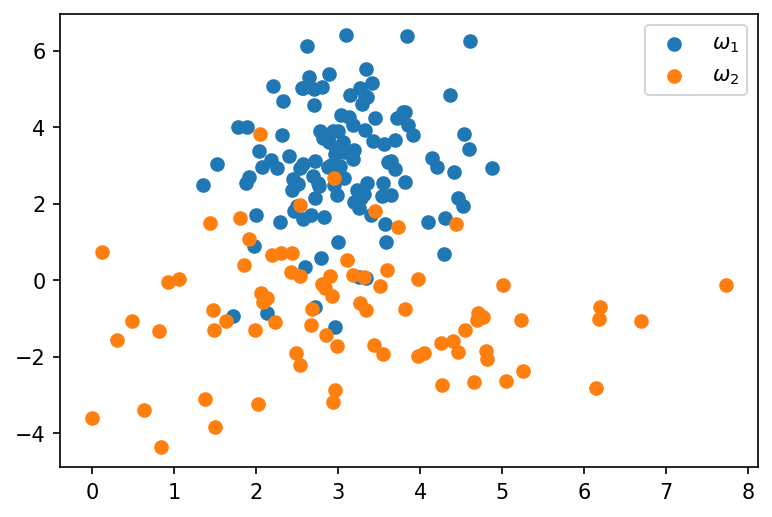

In [5]:
multiclassPlot(train)

### Plot test data

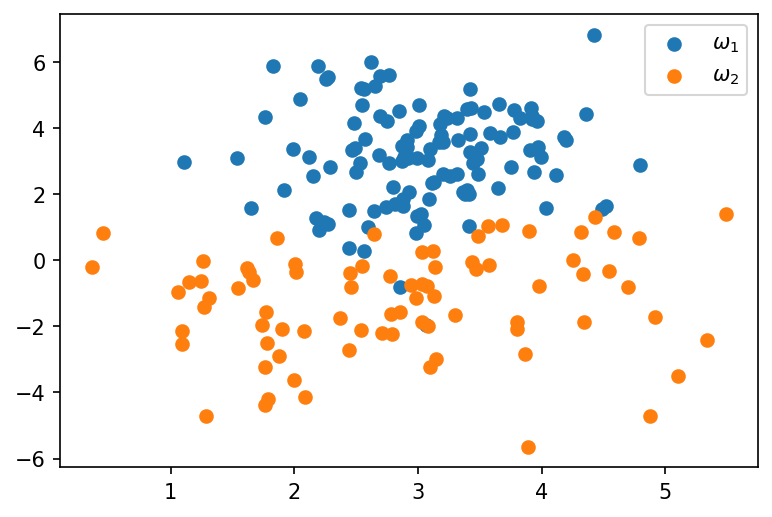

In [6]:
multiclassPlot(test)

### Evaluate models on dataset

In [7]:
display(Latex(datasetEvaluation(train, test).to_latex(escape=False)))

<IPython.core.display.Latex object>

### Discussion on findings.

#### Parzen

What we see when using a $h_1$ that is low is that the estimated density from the training data is failing to generalise.
This is most clearly seen by the high reclassification score and low testing score. What has happened here is that the model fails to capture the general distribution and instead estimate a density that is very accurate for the training data but not in general. I.e, a classic example of overfitting.

This is due to the low $h_1$ value. We recall from the lectures that Parzen-Window estimates the density by summing gaussian kernels for all the samples yielding a estimate for the underlying distribution. When $h_1$ is low, the variance of the gaussian kernel is low and has high values very close to the point. This means that we have a distribution that has very high values in points similar to the training data yielding poor results in the test data.

#### KNN

When $k=1$, the nearest neighbor will always be the point itself and it will be classified as the same class as itself.
That is the reason for the low error and high recall. When classifying the test data we get an error rate of $0.08$ and the recall falls a bit. Our model has therefore not been able to generalise.

In the $k=5$ case, we observe that reclassification and test confusion matrix and performance metrics are quite similar. Our model has therefore been able to generalise.

## Problem 2

### Read Data

In [8]:
pfile = 'lab4_2.p'
with open(pfile, "rb") as fp:
    (X_2D3cl, X_2D4cl, X_2D4cl_ms, X_2D4cl_hs, 
    X_3D3cl_ms, Y_2D3cl, Y_2D4cl, Y_2D4cl_ms, 
    Y_2D4cl_hs, Y_3D3cl_ms) = pickle.load(fp)

### 2D Features - 3 class problem

#### Read Data

In [9]:
train2d3cl = readData(Y_2D3cl)
test2d3cl = readData(X_2D3cl)

#### Scatterplot of training data

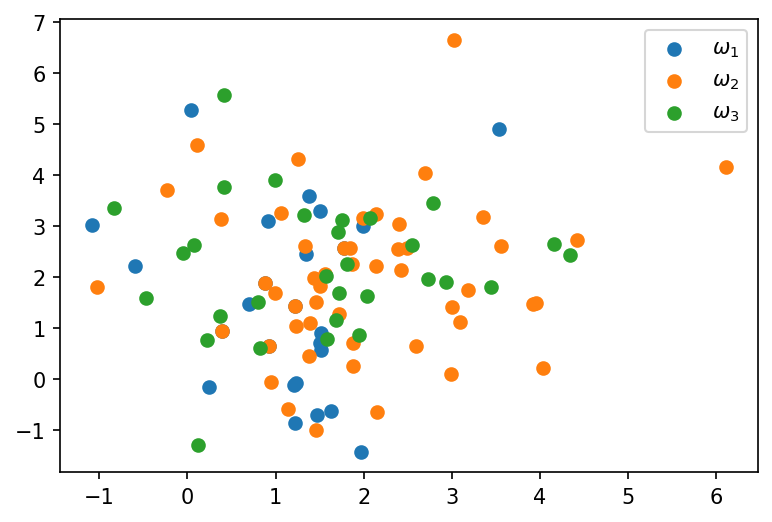

In [10]:
multiclassPlot(train2d3cl)

#### Scatterplot of test data

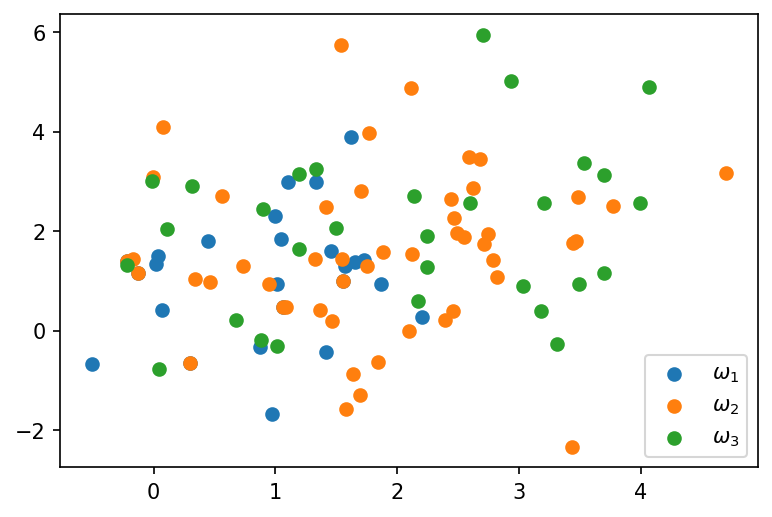

In [11]:
multiclassPlot(test2d3cl)

#### Evaluate dataset

In [12]:
display(Latex(datasetEvaluation(train2d3cl, test2d3cl).to_latex(escape=False)))

<IPython.core.display.Latex object>

### 2D Features - 4 class problem

#### Read Data

In [13]:
train_2D4cl = readData(Y_2D4cl)
test_2D4cl = readData(X_2D4cl)

#### Plot Training Data

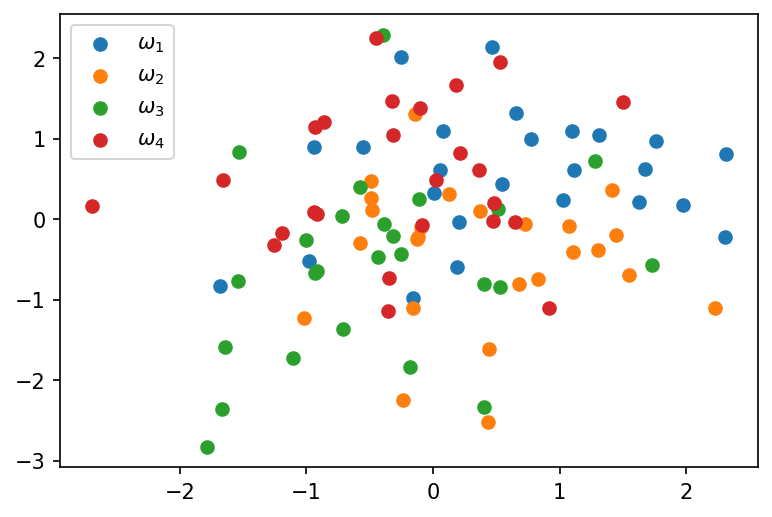

In [14]:
multiclassPlot(train_2D4cl)

#### Plot Training Data

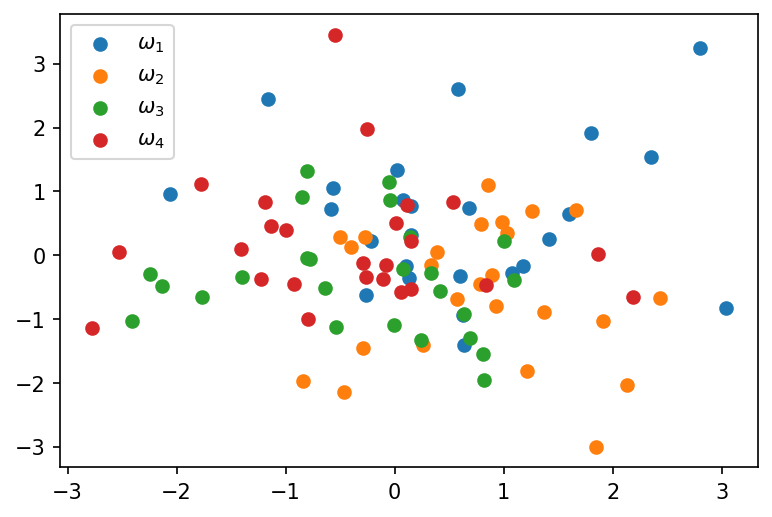

In [15]:
multiclassPlot(test_2D4cl)

#### Evaluate dataset

In [16]:
display(Latex(datasetEvaluation(train_2D4cl, test_2D4cl).to_latex(escape=False)))

<IPython.core.display.Latex object>

### 2D Features - 4 class problem with medium seperability

#### Read Data

In [17]:
train_2D4cl_ms = readData(Y_2D4cl_ms)
test_2D4cl_ms = readData(X_2D4cl_ms)

#### Plot training data

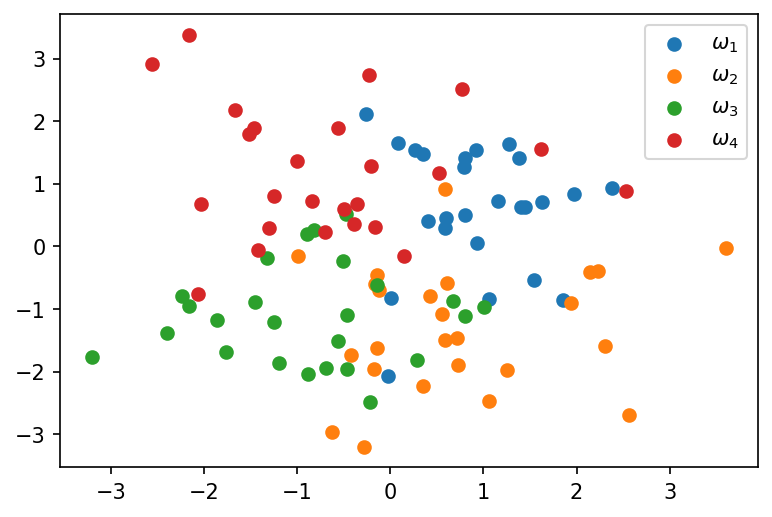

In [18]:
multiclassPlot(train_2D4cl_ms)

#### Plot test data

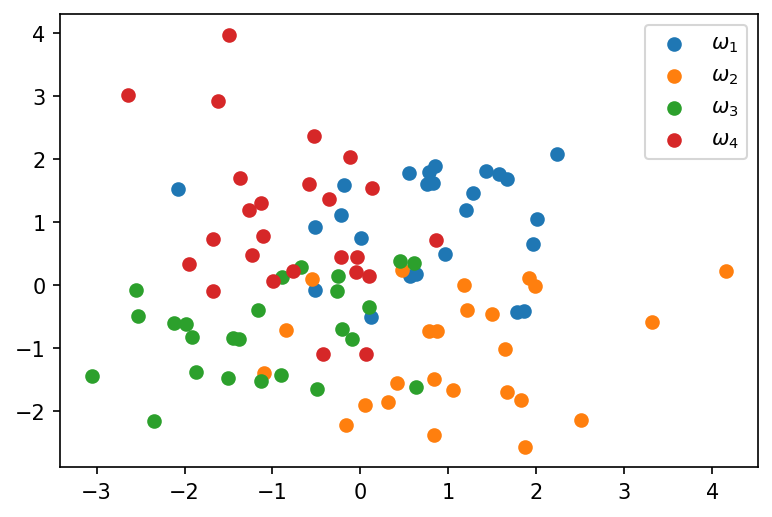

In [19]:
multiclassPlot(test_2D4cl_ms)

#### Evaluate dataset

In [20]:
display(Latex(datasetEvaluation(train_2D4cl_ms, test_2D4cl_ms).to_latex(escape=False)))

<IPython.core.display.Latex object>

### 2D Features - 4 class problem with high seperability

#### Read Data

In [21]:
train_2D4cl_hs = readData(Y_2D4cl_hs)
test_2D4cl_hs = readData(X_2D4cl_hs)

#### Plot training data

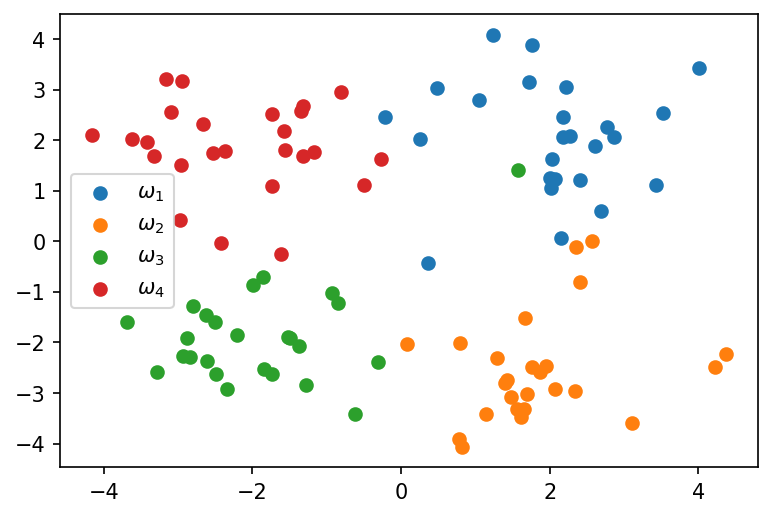

In [22]:
multiclassPlot(train_2D4cl_hs)

#### Plot test data

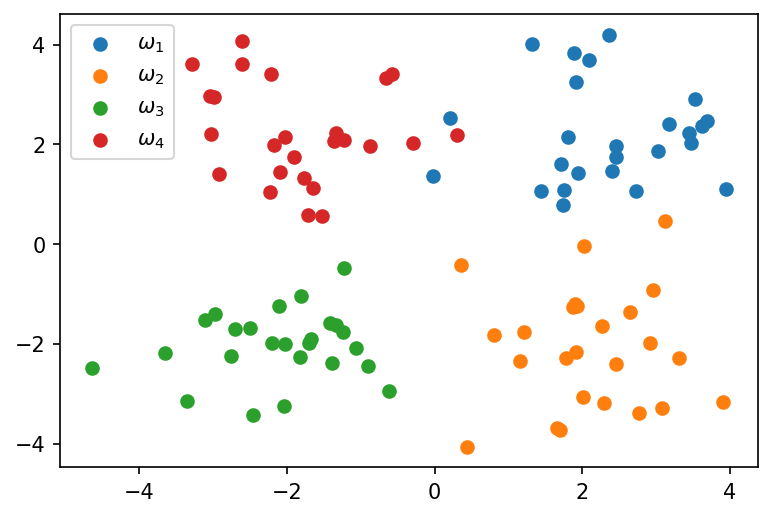

In [23]:
multiclassPlot(test_2D4cl_hs)

#### Evaluate dataset

In [24]:
display(Latex(datasetEvaluation(train_2D4cl_hs, train_2D4cl_hs).to_latex(escape=False)))

<IPython.core.display.Latex object>

### Discussion on findings in two previous subchapters

We see that the models perform better and better as the classes become more seperable. This is expected behavior and we saw this when worked with the bayes error rate. When the classes densities are closer together, the risk also increases. 

### 3D - 3 Class problem with medium seperability

#### Read Data

In [25]:
train_3d3cl_ms = readData(Y_3D3cl_ms)
test_3d3cl_ms = readData(X_3D3cl_ms)

In [26]:
def multiclassPlot3D(data):
    plt.axes(projection='3d')
    plt.rcParams['figure.dpi'] = 150
    for i in data['class'].unique():
        plt.scatter(data[data['class'] == i]['x1'], 
                    data[data['class'] == i]['x2'],
                    data[data['class'] == i]['x3'],
                    label='$\omega_{}$'.format(i+1))
    plt.legend()

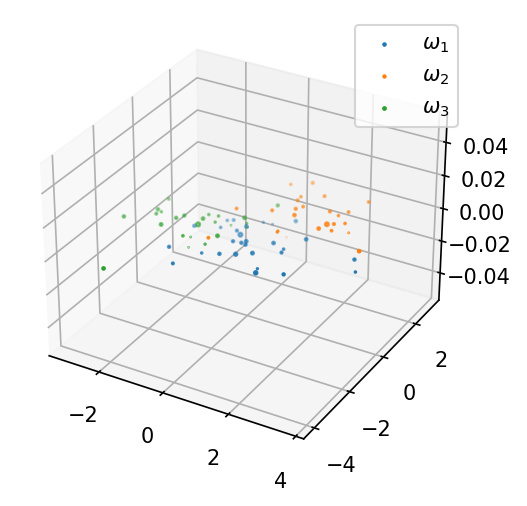

In [27]:
multiclassPlot3D(train_3d3cl_ms)

#### Evaluate dataset

In [31]:
display(Latex(datasetEvaluation(train_3d3cl_ms, test_3d3cl_ms).to_latex(escape=False)))

<IPython.core.display.Latex object>

# Appendix

## Code listing

New functions added to pdffuns

In [ ]:
def normND(mu, sigma, x):
    """Calculate pdf value for single point in multivariate gaussian."""
    dim = len(mu)
    det = np.linalg.det(sigma)
    p = 1 / (np.sqrt((np.pi*2)**dim * det)) * \
        np.exp(-0.5 * np.matmul(
            (x - mu).T,
            np.matmul(
                np.linalg.inv(sigma),
                (x - mu)
            )
        )
    )
    return p


def classifyML(training, test):
    """Classify data using bivariate normal distribution pdf values for a grid.

    This classifier is based on the Norm2D function.

    This functions expects a dataframe with this strict format:
        x1,x2,...,xn feature columns and a class column.
        Each row is one sampled datapoint.

    Args:
        training (dataframe): Training dataframe following above format.
        test (dataframe): Test dataframe following above format.

    Returns:
        predictions: predicted class values
        function values: density values from training set.
    """
    classes = set(training['class'])
    classpred = []
    mus = {}
    sigmas = {}

    # Estimate my and sigma
    for cl in classes:
        mus[cl] = np.array(training[
            training['class'] == cl
            ].loc[:, training.columns != 'class'].mean())

        sigmas[cl] = np.array(
                training[
                    training['class'] == cl
                ].loc[:, training.columns != 'class'].cov())

    # Classify training data from
    classpred = test.apply(
        lambda row: np.argmax(
            [normND(
                mus[x], sigmas[x], np.array(row.drop('class'))
                ) for x in classes]), axis=1
        )

    funcval = test.apply(
        lambda row: [normND(
                mus[x], sigmas[x], np.array(row.drop('class'))
                ) for x in classes], axis=1
        )

    return np.array(classpred.tolist()), np.array(funcval.tolist())


def densityPoint(density, mgrids, vec):
    """Find density value that are closest to a vector in meshgrid."""
    vectors = []
    for i in range(len(mgrids)):
        vectors.append(
            np.array(np.unravel_index(
                    np.abs(
                        np.array(mgrids[i]) - vec[i]
                    ).argmin(),
                    np.shape(mgrids[i])
                ))
            )

    return density[tuple(np.sum(vectors, axis=0))]


def parzenND(data, h1, mgrids):
    """Use Parzen window density estimation to calculate decision boundary.

    Args:
        data (List of arrays): List of arrays for datasets.
        h1 (float): Window size
        X (X grid): values from meshgrid
        Y (Y grid): values from meshgrid

    Returns:
        classifier: Parzen window density estimation classification
        Z: Unscaled density.
    """
    N = len(data[0])
    d = len(data)
    hn = h1 / np.sqrt(N)
    hnI = np.eye(d) * hn**d
    Z = np.zeros(np.shape(mgrids[0]))
    mgrids = np.array(mgrids)

    dims = np.shape(mgrids)
    vectorized = mgrids.reshape((dims[0], np.prod(dims[1:])))
    for i in range(N):
        Z += np.array(
            list(
                map(lambda x: normND(data[:, i], hnI, x),
                    [vectorized[:, i] for i in range(np.prod(dims[1:]))])
            )
        ).reshape(dims[1:])

    return Z


def classifyParzen(train, test, window=0.5, delta=0.5):
    """Classify test dataset by estimating training sets density using Parzen.

    This classifier is based on the Parzen function.

    This functions expects a dataframe with this strict format:
        x1,x2,...,xn feature columns and a class column.
        Each row is one sampled datapoint.

    Args:
        train (DataFrame): Training dataset
        test (DataFrame): Test dataset
        window (float, optional): [h1 parameter in parzen]. Defaults to 0.5.
        delta (float, optional): [step in np.arange]. Defaults to 0.1.

    Returns:
        Classpred: Pandas Series of predicted class labels.
    """
    densities = {}
    classes = set(train['class'])
    ranges = []

    for feature in train.drop('class', axis=1):
        ranges.append(
            np.arange(
                train[feature].min(), train[feature].max(), delta
            ).reshape(-1, 1)
        )

    mgrid = np.meshgrid(*ranges)

    for cl in classes:
        data = np.array(train[
            train['class'] == cl
        ].loc[:, train.columns != 'class']).T
        densities[cl] = parzenND(data, window, mgrid)

    classpred = test.apply(
        lambda row: np.argmax(
            [densityPoint(
                densities[x], mgrid, vec=np.array(row.drop('class'))
            ) for x in classes]), axis=1
        )

    return classpred


def knnCLassify(train, point, k=1):
    """Apply helper function. Used in knnCLassifier.

    Args:
        train (training dataset)
        point (point to classify)
        k (number of neighbors to compare with)

    Returns:
        integer: predicted class of point.
    """
    nearest = np.linalg.norm(
        train.drop('class', axis=1) - point.drop('class'),
        axis=1
        ).argsort()[:k]
    return (train.iloc[nearest]['class'].value_counts().index.tolist()[0])


def knnClassifier(train, test, k=1):
    """Classify dataset using knn method.

    This functions expects a dataframe with this strict format:
        x1,x2,...,xn feature columns and a class column.
        Each row is one sampled datapoint.

    Args:
        train (pandas): Training set.
        test (pandas): Test set.
        k (int, optional): [neigbors to visit]. Defaults to 1.

    Returns:
        [series]: Predicted classes.
    """
    classpred = test.apply(lambda row: knnCLassify(train, row, k=k), axis=1)
    return classpred
